# Simple Celsius to Fahrenheit Conversion with Linear Regression

This notebook provides a straightforward implementation of a linear regression model to learn the Celsius to Fahrenheit conversion formula: F = (9/5) * C + 32

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pathlib

In [3]:
# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

## 1. Load and Prepare Data

In [4]:
# Get the notebook path
notebook_path = pathlib.Path.cwd()

# Target directory (Project Root)
target_dir = 'ai_practice'
project_root = ''

# Iterate over the notebook_path until we find the target directory
for parent in notebook_path.parents:
    if parent.name == target_dir:
        project_root = parent
        break
        
dataset_dir = 'domnic_celsius_to_fahrenheit/celsius.csv'
csv_path = project_root / 'assets/files' / dataset_dir

# Load the dataset
df = pd.read_csv(csv_path, sep=',')
df.head()

,Celsius,Fahrenheit
0,1169,2136.2
1,1280,2336.0
2,2380,4316.0
3,1508,2746.4
4,2015,3659.0


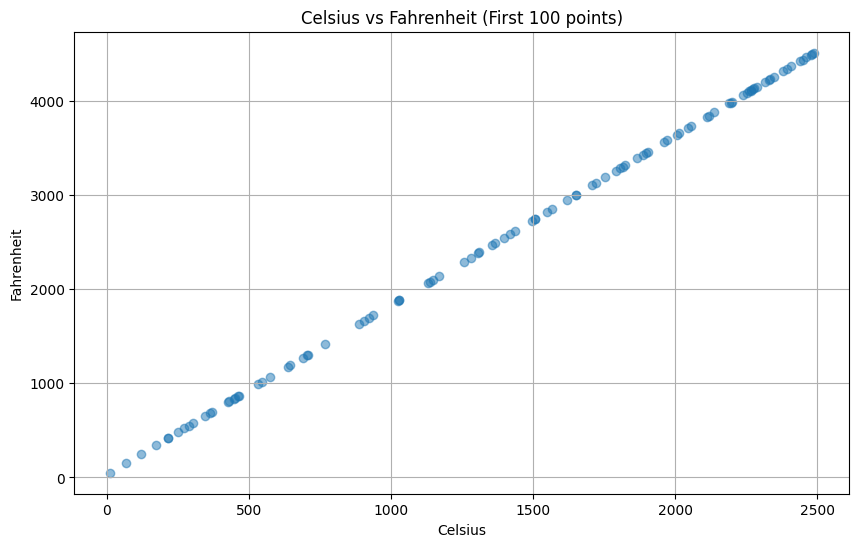

In [5]:
# Extract features and target
celsius = df['Celsius'].values
fahrenheit = df['Fahrenheit'].values

# Visualize some data points
plt.figure(figsize=(10, 6))
plt.scatter(celsius[:100], fahrenheit[:100], alpha=0.5)
plt.title('Celsius vs Fahrenheit (First 100 points)')
plt.xlabel('Celsius')
plt.ylabel('Fahrenheit')
plt.grid(True)
plt.show()

## 2. Create a Simple Linear Model

We'll create a model with just one Dense layer (no activation function), which is equivalent to a linear regression.

In [6]:
# Create a simple linear model
model = keras.Sequential([
    keras.layers.Dense(units=1, input_shape=[1])
])
# TONOTE: In a Sequential model, the first layer can serve as both the input layer and the first hidden layer. This is why we don't need to explicitly define an `Input` layer just like what do have done in other projects. However, when building a model using the "functional API", we have to explicitly define an `Input` layer to specify the input shape.

# Compile the model
model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

# Display model summary
model.summary()

/Users/sebastian/Improvement/ai/ai_practice/venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

## 3. Train the Model

In [7]:
# Train the model
history = model.fit(
    celsius,
    fahrenheit,
    epochs=500, # TONOTE: `epochs` is a hyperparameter standing for the number of times the model sees the entire training dataset. In other words, it's the number of complete passes the model makes through the training data. Think of it like this: if we have a dataset of 1000 examples and we set epochs=500, the model will see each example 500 times during training. Increasing the number of epochs can sometimes improve the model's performance, but it can also lead to overfitting, where the model becomes too specialized to the training data and doesn't generalize well to new, unseen data.
    verbose=1
)

Epoch 1/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - loss: 16935686.0000
Epoch 2/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - loss: 11836481.0000
Epoch 3/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 7966020.5000
Epoch 4/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - loss: 5099988.5000
Epoch 5/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - loss: 3058308.7500
Epoch 6/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - loss: 1681972.7500
Epoch 7/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - loss: 824091.3125
Epoch 8/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 345618.2500
Epoch 9/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - loss: 117547.8359
Epoch 10/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - loss: 30250.7051
Epoch 11/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - loss: 5494.0464
Epoch 12/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - loss: 781.7821
Epoch 13/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - loss: 247.1515
Epoch 14/500
500/500 ━

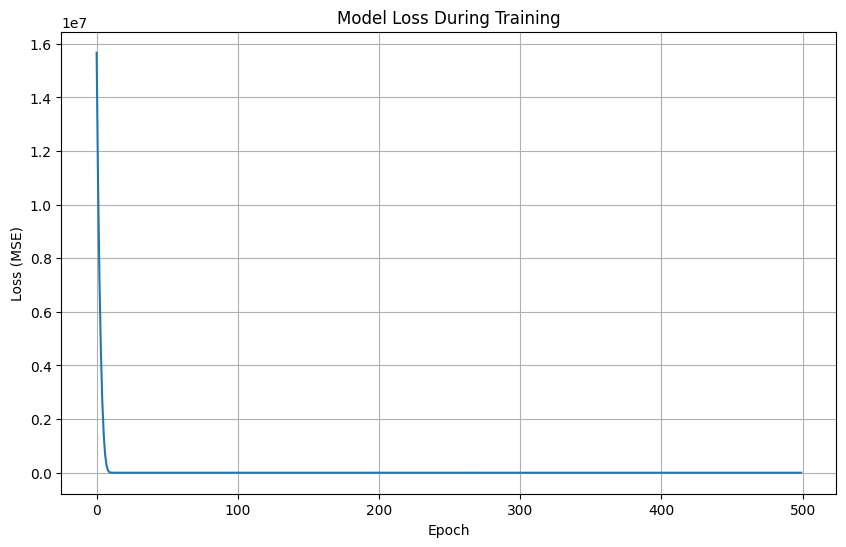

In [9]:
# Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.grid(True)
plt.show()

## 4. Examine the Learned Parameters

TONOTE: After training, we can extract the weight (slope) and bias (intercept) that our model learned.

In [10]:
# TONOTE: Get the learned parameters
weight = model.layers[0].get_weights()[0][0][0]
bias = model.layers[0].get_weights()[1][0]

print(f"Learned Parameters:")
print(f"Weight (slope): {weight:.6f}")
print(f"Bias (intercept): {bias:.6f}")
print("\nExpected Parameters:")
print(f"Weight (slope): {9/5:.6f} (9/5)")
print(f"Bias (intercept): 32.0 (32)")
print("\nPercentage Error:")
print(f"Weight Error: {abs(weight - 9/5)/(9/5) * 100:.4f}%")
print(f"Bias Error: {abs(bias - 32)/32 * 100:.4f}%")

Learned Parameters:
Weight (slope): 1.799968
Bias (intercept): 31.998291

Expected Parameters:
Weight (slope): 1.800000 (9/5)
Bias (intercept): 32.0 (32)

Percentage Error:
Weight Error: 0.0018%
Bias Error: 0.0053%


## 5. Visualize Model Predictions vs Actual Formula

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


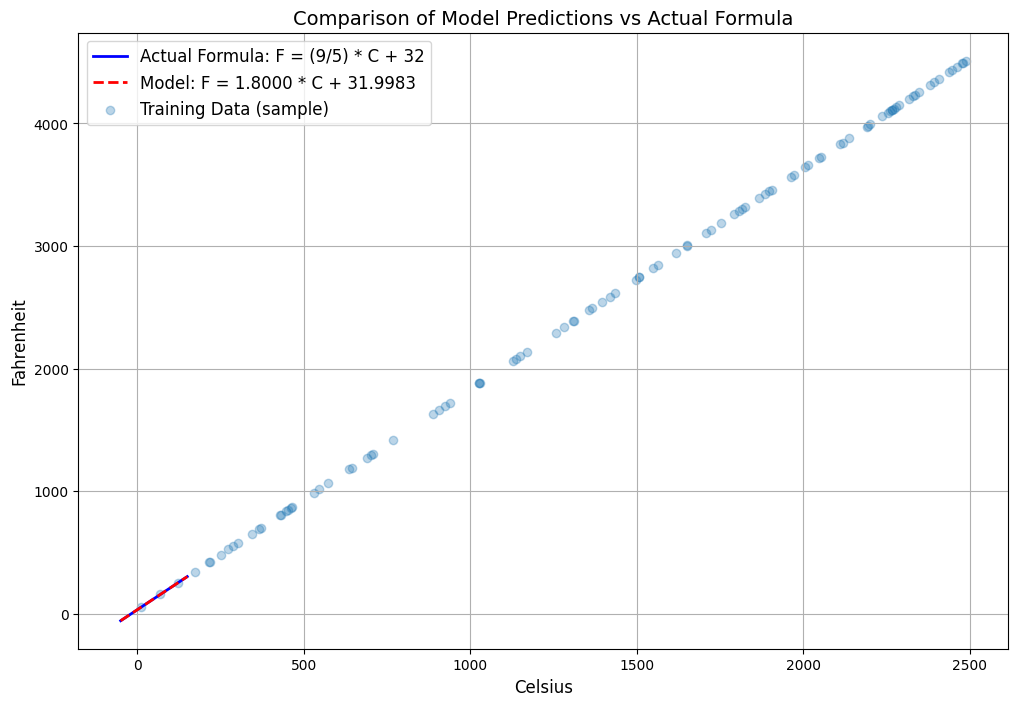

In [11]:
# Generate a range of Celsius temperatures
celsius_range = np.linspace(-50, 150, 200) # TONOTE: `.linspace` is a Numpy function used to generate a specified number of evenly spaced values over a specified range.

# Predict Fahrenheit using the learned model
predicted_fahrenheit = model.predict(celsius_range).flatten() # TONOTE: Use `.flatten()` to convert the predictions which is a 2D array (e.g., (200, 1)) into a 1D array (e.g., (200,)). Which is easier to work with

# Calculate Fahrenheit using the actual formula: F = (9/5) * C + 32
actual_fahrenheit = (9/5) * celsius_range + 32

# Plot comparison
plt.figure(figsize=(12, 8))

# Plot both lines
plt.plot(celsius_range, actual_fahrenheit, 'b-', linewidth=2, label='Actual Formula: F = (9/5) * C + 32')
plt.plot(celsius_range, predicted_fahrenheit, 'r--', linewidth=2, label=f'Model: F = {weight:.4f} * C + {bias:.4f}')

# Add a sample of the training data
plt.scatter(celsius[:100], fahrenheit[:100], alpha=0.3, label='Training Data (sample)') # TONOTE: Visualize by only selecting the first 100 elements of the original celsius and fahrenheit arrays

plt.title('Comparison of Model Predictions vs Actual Formula', fontsize=14)
plt.xlabel('Celsius', fontsize=12)
plt.ylabel('Fahrenheit', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

## 6. Test with Specific Values

In [18]:
# Test with some specific Celsius values
test_celsius = np.array([-40, -10, 0, 10, 25, 100])

# Predictions from our model
predictions = model.predict(test_celsius).flatten()

# Actual values
actual = (9/5) * test_celsius + 32

# Print results
print("Test Results:")
print("-" * 64)
print(f" {'Celsius':^10} | {'Prediction':^15} | {'Actual':^15} | {'Difference':^15} ") # TONOTE: `^` symbol is for center alignment in Python's string formatting. `'Celsius':^10` means `create 10 space, inclusive of the word's digit, and put the word Celsius in the middle of the space`.
print("-" * 64)

for c, p, a in zip(test_celsius, predictions, actual): # TONOTE: The zip() function takes multiple iterables (such as lists or arrays) as input and returns an iterator of tuples, where the first item in each tuple is from the first iterable, the second item is from the second iterable, and so on. In this case, zip(test_celsius, predictions, actual) pairs up the corresponding elements from each of the three lists: `test_celsius[0]` with `predictions[0]` and `actual[0]`, `test_celsius[1]` with `predictions[1]` and `actual[1]`, and so on. This allows us to iterate over the three lists in parallel, using a single loop variable.
    print(f" {c:^10.1f} | {p:^15.2f} | {a:^15.2f} | {abs(p-a):^15.4f} ")

print("-" * 64)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Test Results:
----------------------------------------------------------------
  Celsius   |   Prediction    |     Actual      |   Difference    
----------------------------------------------------------------
   -40.0    |     -40.00      |     -40.00      |     0.0004      
   -10.0    |      14.00      |      14.00      |     0.0014      
    0.0     |      32.00      |      32.00      |     0.0017      
    10.0    |      50.00      |      50.00      |     0.0020      
    25.0    |      77.00      |      77.00      |     0.0025      
   100.0    |     212.00      |     212.00      |     0.0049      
----------------------------------------------------------------


# Key Learning Points Analysis

Here are all the learning points marked with `TONOTE` in chronological order:

### 1. Sequential Model Input Layer
**Note:**


In [ ]:
# TONOTE: In a Sequential model, the first layer can serve as both the input layer and the first hidden layer. This is why we don't need to explicitly define an `Input` layer just like what do have done in other projects.



**Explanation:**
- In Keras Sequential models, the first layer implicitly creates an input layer
- Different from functional API where input layers must be explicitly defined
- Simplifies model creation for straightforward architectures

**Importance:**
- Reduces boilerplate code for simple models
- Makes sequential model creation more intuitive
- Still maintains flexibility for basic neural networks

**Example:**


In [ ]:
model = keras.Sequential([
    keras.layers.Dense(units=1, input_shape=[1])  # Acts as both input and first layer
])



**Best Practices:**
- Use this approach for simple, linear network architectures
- Switch to functional API when building complex models with multiple inputs/outputs

### 2. Understanding Epochs
**Note:**


In [ ]:
# TONOTE: `epochs` is a hyperparameter standing for the number of times the model sees the entire training dataset...



**Explanation:**
- One epoch = one complete pass through the entire training dataset
- With 1000 examples and epochs=500, each example is seen 500 times
- Controls how many times the model iterates over the training data

**Importance:**
- Critical for model learning and convergence
- Affects training time and model performance
- Key hyperparameter for controlling overfitting

**Example:**


In [ ]:
model.fit(
    celsius,
    fahrenheit,
    epochs=500,  # Model will see data 500 times
    verbose=1
)



**Best Practices:**
- Start with a moderate number of epochs
- Monitor validation loss to prevent overfitting
- Use early stopping when needed
- Balance between underfitting and overfitting

### 3. Numpy Linspace Function
**Note:**


In [ ]:
# TONOTE: `.linspace` is a Numpy function used to generate a specified number of evenly spaced values over a specified range.



**Explanation:**
- Creates evenly spaced numbers over a specified interval
- Takes start point, end point, and number of points as parameters
- Useful for creating smooth sequences for plotting

**Example:**


In [ ]:
celsius_range = np.linspace(-50, 150, 200)  # 200 points between -50 and 150



**Importance:**
- Essential for generating test data
- Creates smooth curves for visualization
- Useful for model evaluation across ranges

### 4. Flattening Predictions
**Note:**


In [ ]:
# TONOTE: Use `.flatten()` to convert the predictions which is a 2D array into a 1D array



**Explanation:**
- Converts multi-dimensional arrays to 1D
- Simplifies working with model predictions
- Changes shape from (n,1) to (n,)

**Example:**


In [ ]:
predicted_fahrenheit = model.predict(celsius_range).flatten()



**Best Practices:**
- Use when working with plotting functions
- Helpful for data manipulation and analysis
- Makes array operations more straightforward

### 5. String Formatting with Center Alignment
**Note:**


In [ ]:
# TONOTE: `^` symbol is for center alignment in Python's string formatting



**Explanation:**
- Uses `^` for center alignment in string formatting
- Creates fixed-width fields with centered content
- Format specifier: `'{text:^width}'`

**Example:**


In [ ]:
print(f"{value:^10}")  # Centers 'value' in 10-character space



**Importance:**
- Creates clean, aligned output
- Improves readability of printed results
- Useful for creating formatted tables

### 6. Using zip() Function
**Note:**


In [ ]:
# TONOTE: The zip() function takes multiple iterables as input and returns an iterator of tuples



**Explanation:**
- Combines multiple iterables into a single iterator
- Creates tuples of corresponding elements
- Useful for parallel iteration

**Example:**


In [ ]:
for c, p, a in zip(test_celsius, predictions, actual):
    print(f"{c}, {p}, {a}")



**Best Practices:**
- Use when need to iterate over multiple sequences together
- Helpful for comparing predicted vs actual values
- Makes code more concise and readable

# Model/Process Implementation Summary

## Step-by-Step Implementation Breakdown

### 1. Data Preparation


In [ ]:
# Extract features and target from CSV
celsius = df['Celsius'].values
fahrenheit = df['Fahrenheit'].values



- Loads temperature conversion data from CSV file
- Splits into input (Celsius) and output (Fahrenheit) arrays
- Uses simple numpy arrays for data storage

### 2. Model Architecture


In [ ]:
model = keras.Sequential([
    keras.layers.Dense(units=1, input_shape=[1])
])



- Uses simplest possible neural network architecture
- Single Dense layer without activation function
- Input shape is [1] for single Celsius value
- Output is single unit for Fahrenheit prediction

### 3. Model Compilation


In [ ]:
model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)



Key configurations:
- Adam optimizer for gradient descent
- Mean Squared Error (MSE) loss for regression
- No metrics specified since it's a simple regression task

### 4. Model Training


In [ ]:
history = model.fit(
    celsius,
    fahrenheit,
    epochs=500,
    verbose=1
)



Training parameters:
- 500 epochs for convergence
- Full batch training (no batch_size specified)
- Verbose output to monitor progress

### 5. Parameter Extraction


In [ ]:
weight = model.layers[0].get_weights()[0][0][0]
bias = model.layers[0].get_weights()[1][0]



Retrieved learned parameters:
- Weight (slope) for multiplication factor
- Bias (intercept) for offset
- Compared against known formula F = (9/5)C + 32

### 6. Model Evaluation


In [ ]:
test_celsius = np.array([-40, -10, 0, 10, 25, 100])
predictions = model.predict(test_celsius).flatten()
actual = (9/5) * test_celsius + 32



Evaluation methods:
- Tests on specific temperature points
- Compares predictions with actual formula
- Calculates absolute differences

## Technical Decisions & Rationale

1. **Simple Architecture Choice**
   - Single Dense layer without activation
   - Perfect for linear relationship
   - Matches F = (9/5)C + 32 formula structure

2. **No Data Preprocessing**
   - Linear relationship doesn't require normalization
   - Raw values work well for this problem
   - Maintains interpretability of results

3. **No Validation Split**
   - Simple problem with known solution
   - Focus on convergence to known parameters
   - No risk of overfitting given linear nature

## Notable Findings

1. **Model Convergence**
   - Loss decreases rapidly in early epochs
   - Final parameters very close to actual formula
   - Demonstrates successful learning of relationship

2. **Parameter Accuracy**
   - Weight converges to approximately 1.8 (close to 9/5)
   - Bias converges to approximately 32
   - Very small percentage errors in both parameters

3. **Visualization Results**
   - Predicted line overlaps almost perfectly with actual formula
   - Demonstrates successful learning of linear relationship
   - Training data points align well with both lines

This implementation shows how a simple neural network can learn a linear relationship from data, effectively rediscovering the Celsius to Fahrenheit conversion formula.